## 1. Convolutional Neural Network

#### Task a
Implement a padding function that takes in a matrix of any size (representing a picture), the
padding size and returns the padded matrix.

In [1]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [2]:
def pad_matrix(matrix, padding_size):
    rows, cols = matrix.shape
    
    padded_rows = rows + 2 * padding_size
    padded_cols = cols + 2 * padding_size
    
    padded_matrix = np.zeros((padded_rows, padded_cols))
    
    padded_matrix[padding_size:padded_rows-padding_size, padding_size:padded_cols-padding_size] = matrix
    
    return padded_matrix

In [3]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])


padding_size = 2


padded_matrix = pad_matrix(matrix, padding_size)
padded_matrix

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 3., 0., 0.],
       [0., 0., 4., 5., 6., 0., 0.],
       [0., 0., 7., 8., 9., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

#### Task b

Implement 2 different models and compare by visualising the loss function (all in the same plot). The data set to be used is the digit recognition MNIST dataset. Models to be compared are in subtasks a and b. The choice of activation and optimization functions are left to the student. The number of
epochs for each model is 300.

###### Subtask a
Flatten all the pictures and feed them to an MLP model to classify the dataset. The MLP model should have 3 hidden layers of different sizes.

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
train_dataset = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
train_dataset.data.size()

100%|██████████| 9912422/9912422 [00:00<00:00, 100991831.51it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 71847979.73it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 58701779.05it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9714701.05it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



torch.Size([60000, 28, 28])

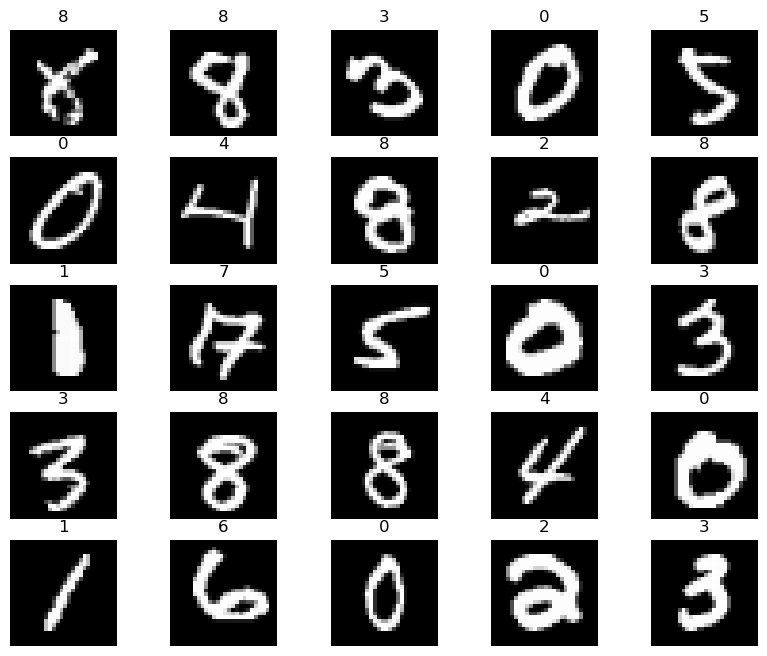

In [7]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
train_data = DataLoader(train_dataset, batch_size=64, shuffle=True)
train_data

In [9]:
flatten_data_size = train_dataset.data.size(1) * train_dataset.data.size(2)
flatten_data_size

784

In [10]:
network = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(flatten_data_size, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 10),
    torch.nn.Softmax(dim=1)
).to(device)
network

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=32, bias=True)
  (4): ReLU()
  (5): Linear(in_features=32, out_features=16, bias=True)
  (6): ReLU()
  (7): Linear(in_features=16, out_features=10, bias=True)
  (8): Softmax(dim=1)
)

In [11]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(), lr=1e-3)

In [12]:
network.train()
first_model_epochs_losses = []
for epoch in tqdm(range(300)):
    epoch_losses = []
    for batch_idx, (data, target) in enumerate(train_data):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = network(data)
        loss_value = loss(output, target)
        epoch_losses.append(loss_value.item())
        loss_value.backward()
        optimizer.step()
    first_model_epochs_losses.append(np.mean(epoch_losses))

100%|██████████| 300/300 [29:15<00:00,  5.85s/it]


###### Ssubtask b

Make use of Conv2d layer to implement a model with 2 different hidden layers, a pooling
layer after each conv layer and lastly flatten the pictures to be feed to a linear layer.

In [19]:
network_1 = torch.nn.Sequential(
    torch.nn.Conv2d(1, 16, 5, 1, 2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(16, 32, 5, 1, 2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Flatten(),
    torch.nn.Linear(32 * 7 * 7, 10),
    torch.nn.Softmax(dim=1)
).to(device)
network_1

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1568, out_features=10, bias=True)
  (8): Softmax(dim=1)
)

In [20]:
loss_1 = torch.nn.CrossEntropyLoss()
optimizer_1 = torch.optim.Adam(network_1.parameters(), lr=1e-3)

In [21]:
network_1.train()
second_model_epochs_losses = []
for epoch in tqdm(range(300)):
    epoch_losses = []
    for batch_idx, (data, target) in enumerate(train_data):
        data = data.to(device)
        target = target.to(device)
        optimizer_1.zero_grad()
        output = network_1(data)
        loss_value = loss_1(output, target)
        epoch_losses.append(loss_value.item())
        loss_value.backward()
        optimizer_1.step()
    second_model_epochs_losses.append(np.mean(epoch_losses))

100%|██████████| 300/300 [31:16<00:00,  6.26s/it]


In [38]:
import plotly.graph_objects as go

fig = go.Figure()
trace1 = go.Scatter(x=list(range(300)), y=first_model_epochs_losses, name='Dense network')
fig.add_trace(trace1)

trace2 = go.Scatter(x=list(range(300)), y=second_model_epochs_losses, name='CNN')
fig.add_trace(trace2)

fig.update_layout(title="Multiple Plots on the Same Plot")
fig.show()

We can see that the convolutional model converges faster.

## 2. Graph Convolutional Network

#### Task a

Given the following neighborhood aggregation formula of GCN:

$$
h_v^{l+1} = \sigma \left( W_l \sum_{u \in N(v)} \frac{h_u^l}{|N(v)|} + B_lh_u^l \right)
$$

derive the matrix formulation of $\sum_{u \in N(v)} \frac{h_u^l}{|N(v)|}$

Let's consider matrix $H^l \in R^{|V| \times d}$ as the matrix of nodes representations at layer $l$. With ommiting bias for notation simplicity we can write unnormalized convolution result as: 

$$
H^l = \sigma \left( AH^{l-1}W_l \right)
$$

The sum notation is described by $D^{-\frac{1}{2}} A D^{-\frac{1}{2}} H^{l-1}$